In [51]:
# ARMA model self-study
# Code Reference: http://www.statsmodels.org/0.6.1/examples/notebooks/generated/tsa_arma_0.html

import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.arima_process import arma_generate_sample, ArmaProcess
%matplotlib inline

In [15]:
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [19]:
dta = sm.datasets.sunspots.load_pandas().data
dta.head()

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0


In [20]:
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta['YEAR']
dta.head()

,SUNACTIVITY
1700-12-31,5.0
1701-12-31,11.0
1702-12-31,16.0
1703-12-31,23.0
1704-12-31,36.0


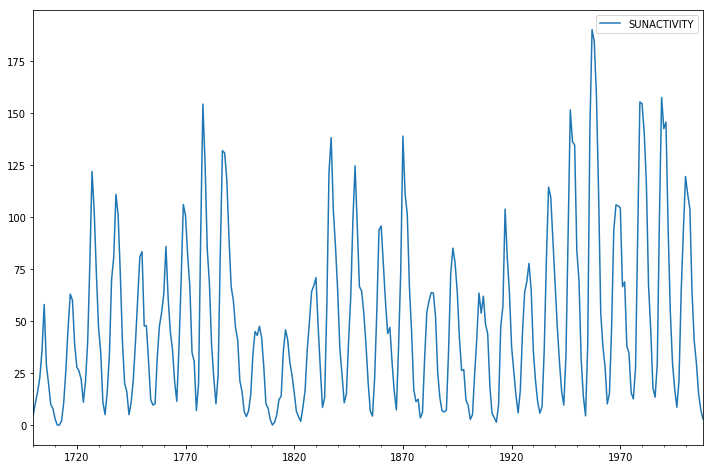

In [23]:
dta.plot(figsize=(12,8))

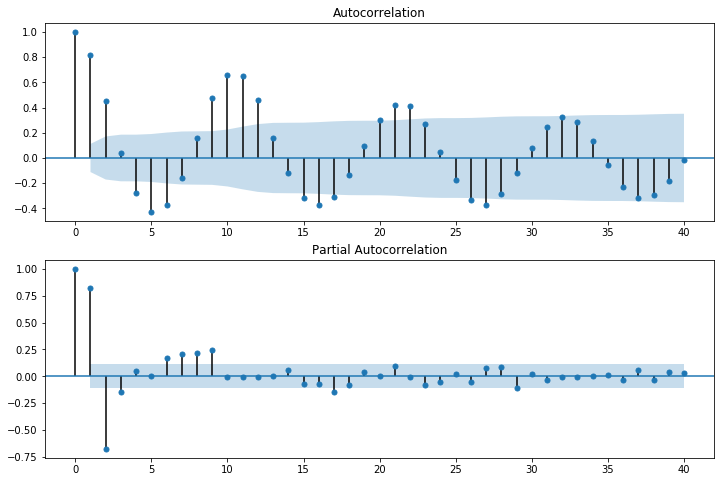

In [24]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

In [25]:
arma_mod20 = sm.tsa.ARMA(dta, (2,0)).fit()
print(arma_mod20.params)

const                49.659543
ar.L1.SUNACTIVITY     1.390656
ar.L2.SUNACTIVITY    -0.688571
dtype: float64


In [28]:
arma_mod30 = sm.tsa.ARMA(dta, (3,0)).fit()
print(arma_mod30.params)

const                49.749938
ar.L1.SUNACTIVITY     1.300811
ar.L2.SUNACTIVITY    -0.508093
ar.L3.SUNACTIVITY    -0.129650
dtype: float64


In [30]:
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

2622.636338065856 2637.56970317 2628.60672591


In [31]:
print(arma_mod30.aic, arma_mod30.bic, arma_mod30.hqic)

2619.403628696734 2638.07033508 2626.8666135


In [33]:
# durbin_watson checks if the disturbance term has autocorrelation
sm.stats.durbin_watson(arma_mod30.resid.values)

1.9564821588448964

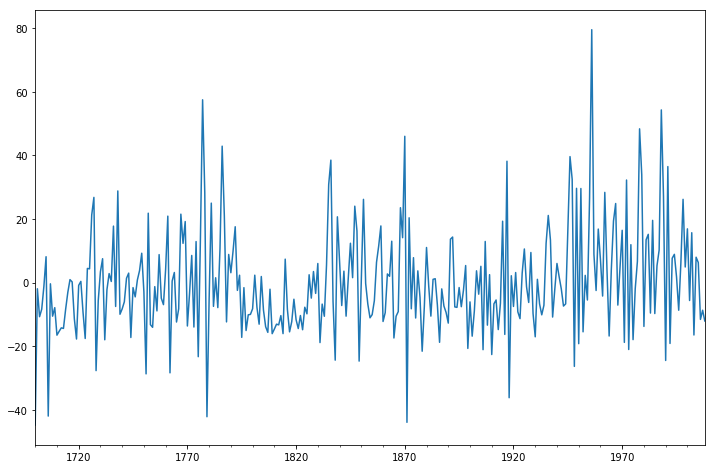

In [34]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax=ax)

In [36]:
resid = arma_mod30.resid

# Test whether a sample differs from a normal distribution
stats.normaltest(resid)

NormaltestResult(statistic=49.844926933383633, pvalue=1.500761365362159e-11)

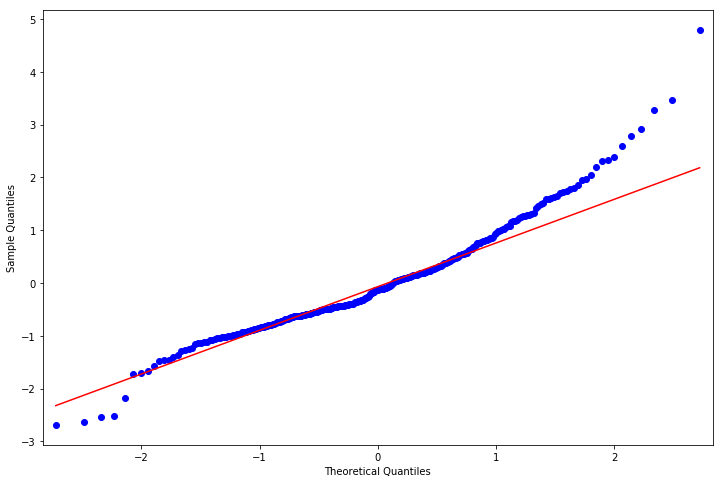

In [38]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

# qqplot is a probability plot
# which is a graphical method for comparing two probability distributions
# by plotting their quantities against each other 
fig = qqplot(resid, line='q', ax=ax, fit=True)

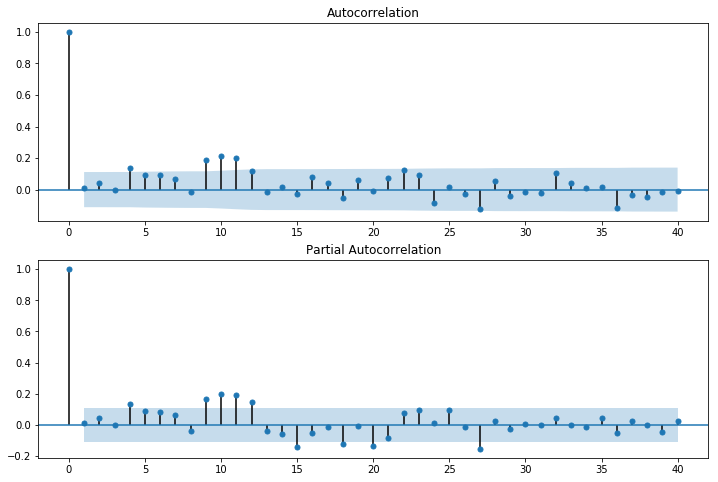

In [42]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [43]:
r, q, p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', 'AC', 'Q', 'Prob(>Q)'])
print(table.set_index('lag'))

            AC          Q      Prob(>Q)
lag                                    
1.0   0.009178   0.026283  8.712120e-01
2.0   0.041793   0.573027  7.508768e-01
3.0  -0.001335   0.573587  9.024515e-01
4.0   0.136089   6.408919  1.706205e-01
5.0   0.092469   9.111840  1.046855e-01
6.0   0.091949  11.793268  6.674287e-02
7.0   0.068748  13.297228  6.518922e-02
8.0  -0.015020  13.369258  9.976042e-02
9.0   0.187592  24.641911  3.393908e-03
10.0  0.213717  39.321952  2.229512e-05
11.0  0.201082  52.361051  2.345034e-07
12.0  0.117181  56.804080  8.574643e-08
13.0 -0.014055  56.868219  1.893984e-07
14.0  0.015398  56.945458  3.997827e-07
15.0 -0.024967  57.149211  7.741797e-07
16.0  0.080917  59.296677  6.872410e-07
17.0  0.041139  59.853652  1.110980e-06
18.0 -0.052021  60.747340  1.548483e-06
19.0  0.062496  62.041603  1.831703e-06
20.0 -0.010302  62.076891  3.381349e-06
21.0  0.074453  63.926554  3.193699e-06
22.0  0.124955  69.154655  8.978729e-07
23.0  0.093161  72.070911  5.800040e-07


In [44]:
predict_sunspots = arma_mod30.predict('1990', '2012', dynamic=True)
print(predict_sunspots)

1990-12-31    167.047467
1991-12-31    140.993097
1992-12-31     94.859220
1993-12-31     46.860972
1994-12-31     11.242588
1995-12-31     -4.721364
1996-12-31     -1.167033
1997-12-31     16.185560
1998-12-31     39.021785
1999-12-31     59.449837
2000-12-31     72.170176
2001-12-31     75.376869
2002-12-31     70.436564
2003-12-31     60.731677
2004-12-31     50.201847
2005-12-31     42.076028
2006-12-31     38.114245
2007-12-31     38.454577
2008-12-31     41.963748
2009-12-31     46.869238
2010-12-31     51.423241
2011-12-31     54.399728
2012-12-31     55.321722
Freq: A-DEC, dtype: float64


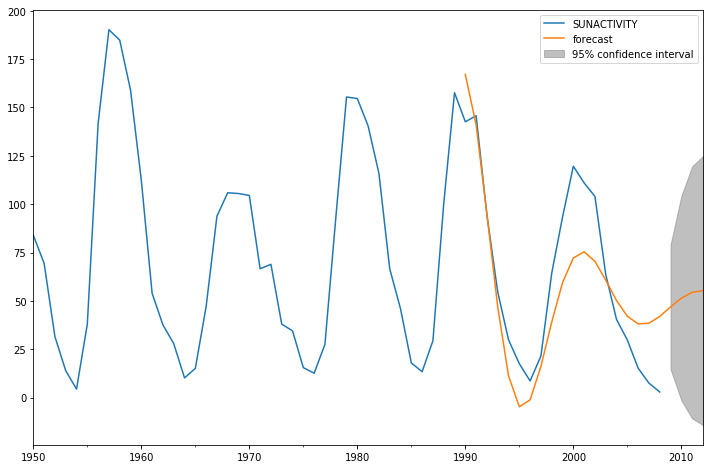

In [48]:
fig, ax =  plt.subplots(figsize=(12, 8))
ax = dta.loc['1950':].plot(ax=ax)
fig = arma_mod30.plot_predict('1990','2012', dynamic=True, ax=ax, plot_insample=False)

In [49]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean

In [50]:
mean_forecast_err(dta.SUNACTIVITY, predict_sunspots)

<bound method Series.mean of 1700-12-31          NaN
1701-12-31          NaN
1702-12-31          NaN
1703-12-31          NaN
1704-12-31          NaN
1705-12-31          NaN
1706-12-31          NaN
1707-12-31          NaN
1708-12-31          NaN
1709-12-31          NaN
1710-12-31          NaN
1711-12-31          NaN
1712-12-31          NaN
1713-12-31          NaN
1714-12-31          NaN
1715-12-31          NaN
1716-12-31          NaN
1717-12-31          NaN
1718-12-31          NaN
1719-12-31          NaN
1720-12-31          NaN
1721-12-31          NaN
1722-12-31          NaN
1723-12-31          NaN
1724-12-31          NaN
1725-12-31          NaN
1726-12-31          NaN
1727-12-31          NaN
1728-12-31          NaN
1729-12-31          NaN
                ...    
1983-12-31          NaN
1984-12-31          NaN
1985-12-31          NaN
1986-12-31          NaN
1987-12-31          NaN
1988-12-31          NaN
1989-12-31          NaN
1990-12-31   -24.447467
1991-12-31     4.706903
1992-12-31 

In [53]:
np.random.seed(1234)
arparams = np.array([1, .75, -.65, -.55, .9])
maparams = np.array([1, .65])

arma_t = ArmaProcess(arparams, maparams)
print(arma_t.isinvertible, arma_t.isstationary )

True False


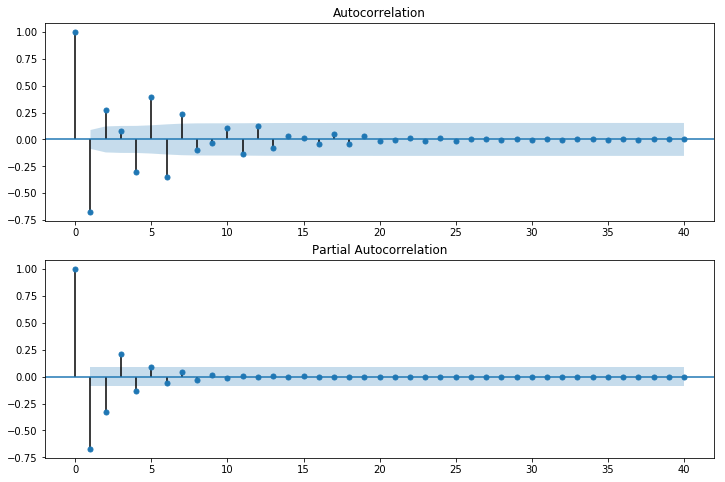

In [65]:
arma_rvs = arma_t.generate_sample(nsample=500, burnin=250, scale=2.5)

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arma_rvs, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arma_rvs, lags=40, ax=ax2)